In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('AutoData (1).csv')

In [10]:
df.head(5)

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   make              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [12]:
df.isnull().sum()

symboling           0
make                0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# EDA

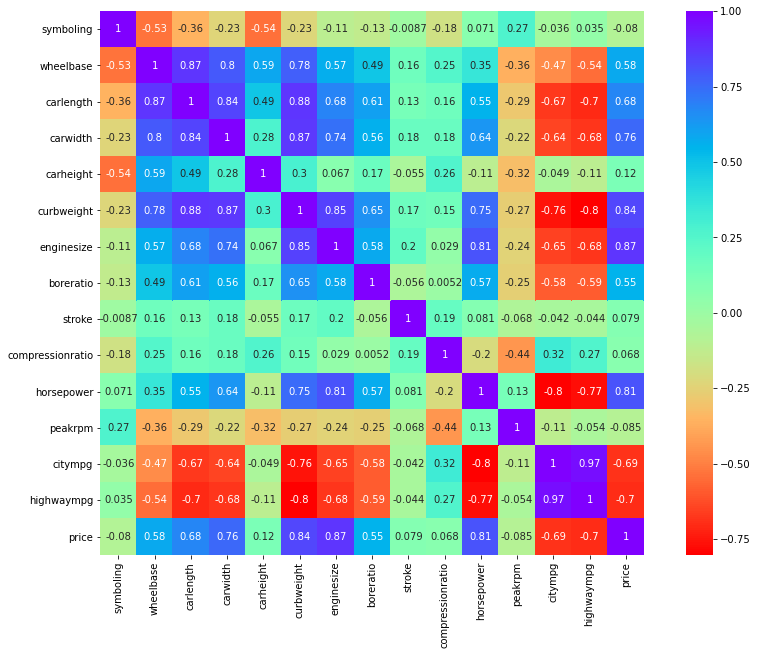

In [13]:
plt.subplots(figsize=(15,10))
sns_plot = sns.heatmap(df.corr(),annot =True,cmap='rainbow_r',square=True)
fig = sns_plot.get_figure()
fig.savefig("corrHeatmap.png")

In [14]:
tempdf = df[{'symboling','enginetype','boreratio','horsepower', 'peakrpm', 'citympg', 'highwaympg','enginesize','price'}]

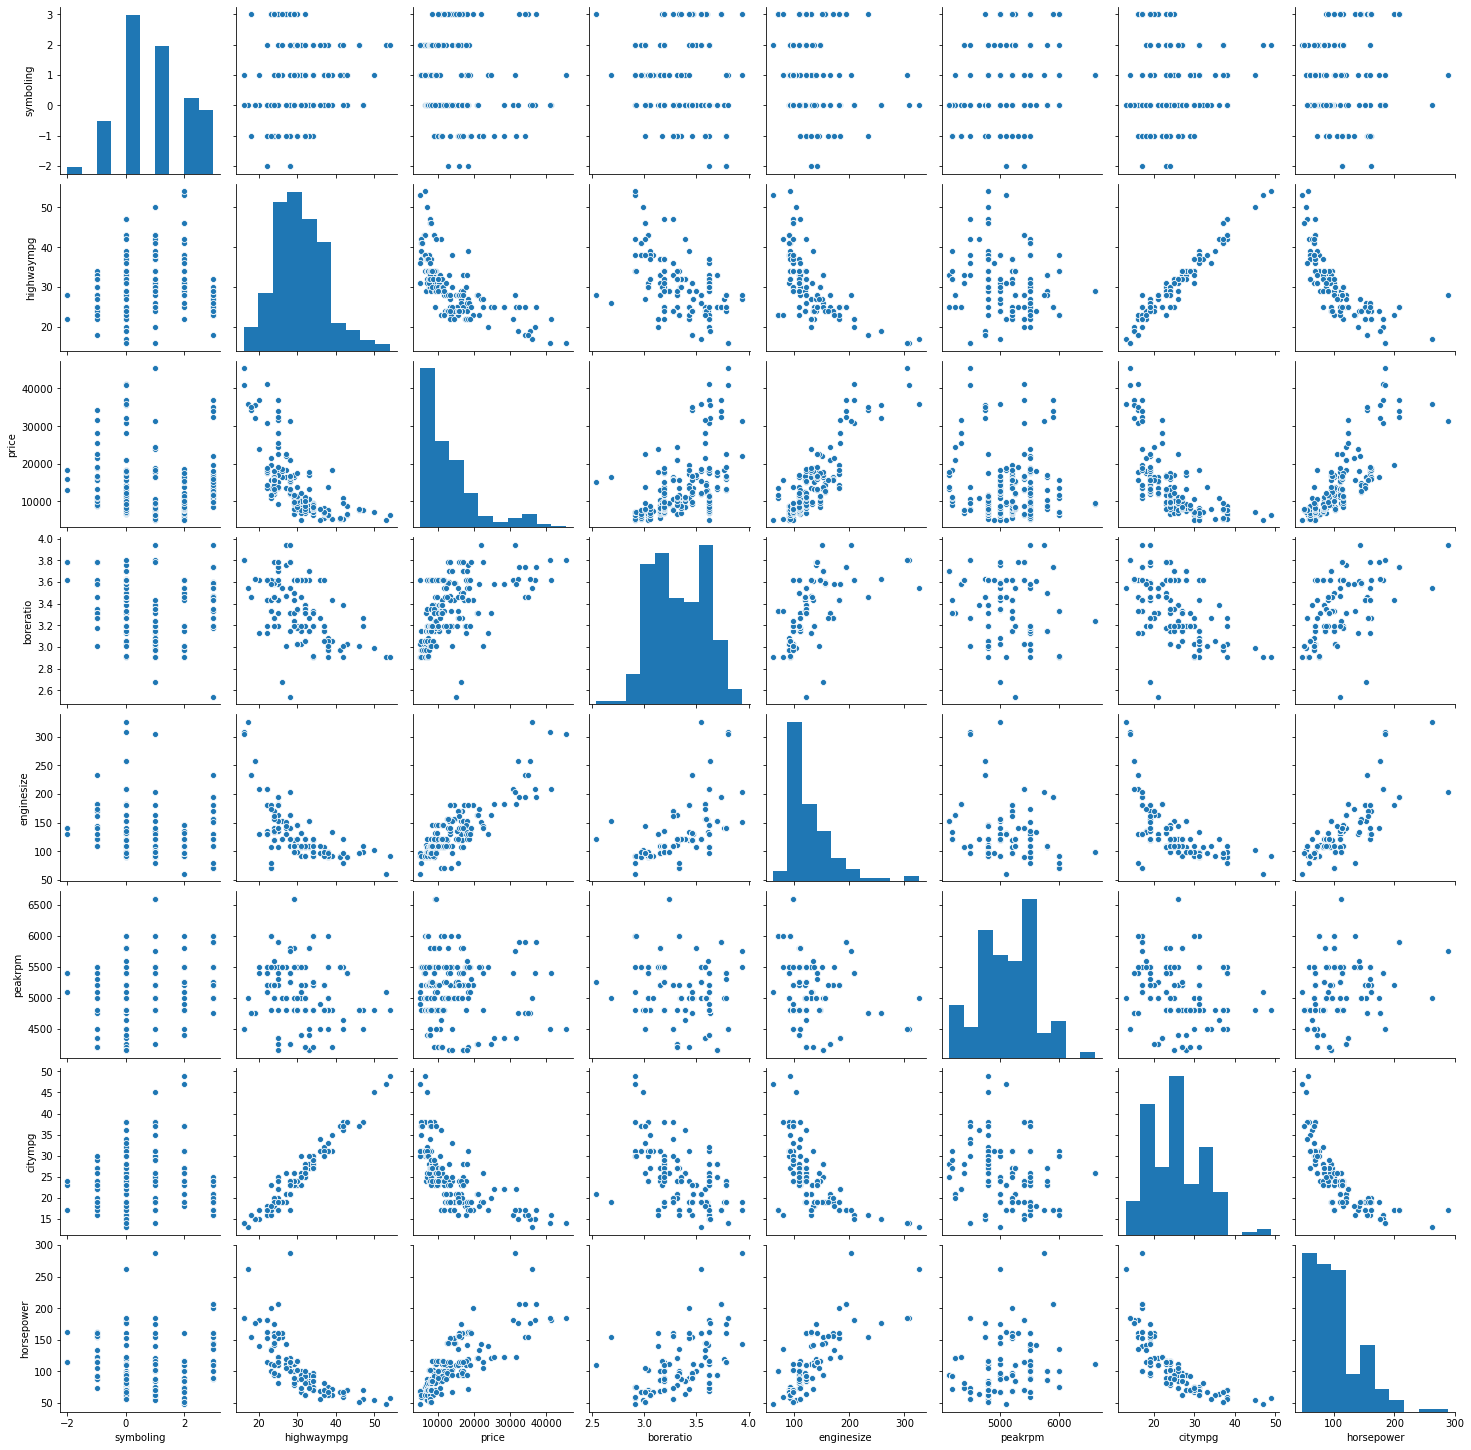

In [15]:
sns.pairplot(tempdf)

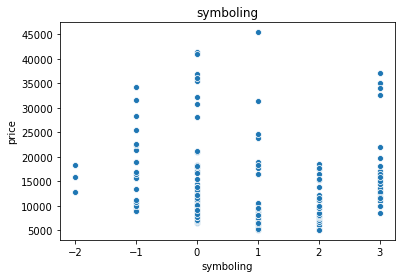

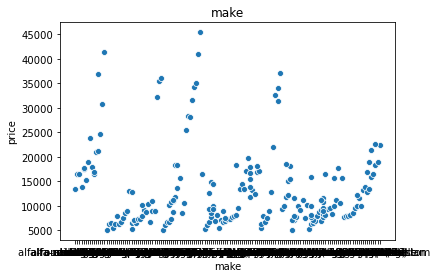

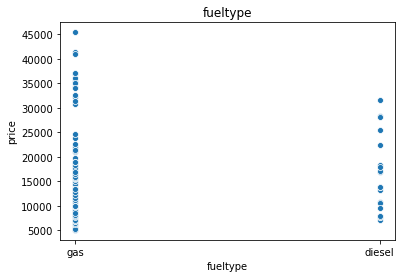

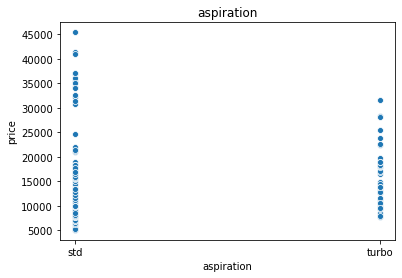

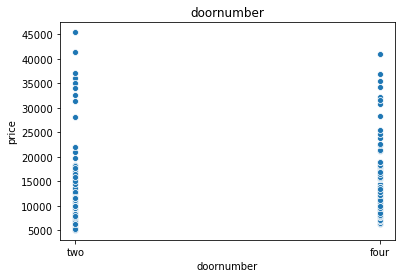

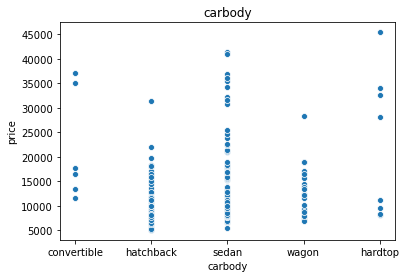

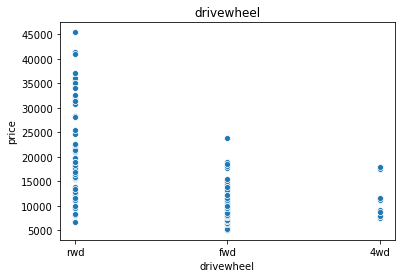

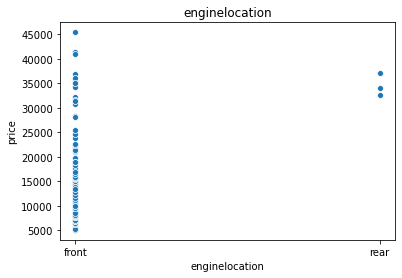

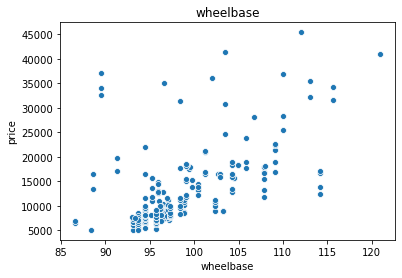

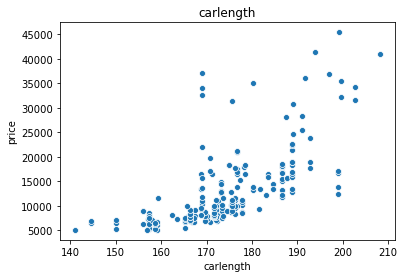

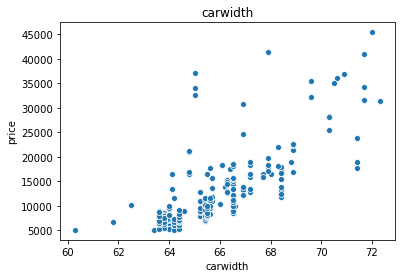

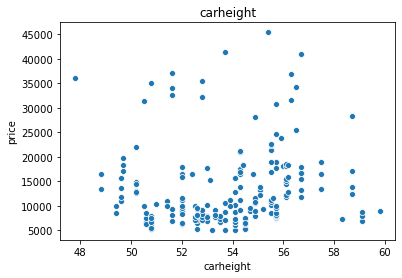

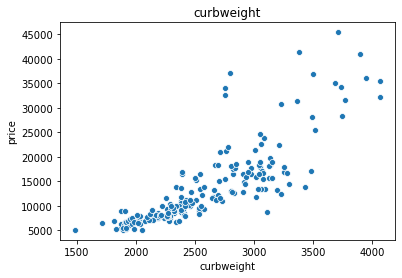

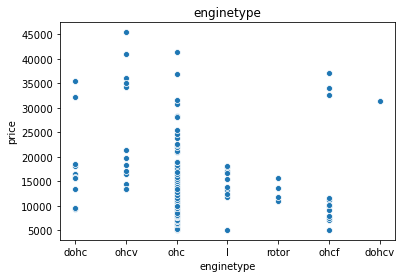

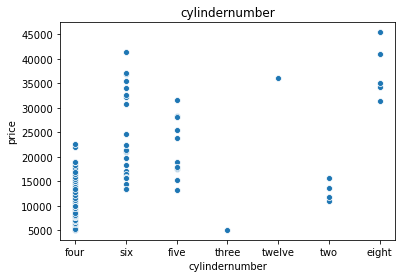

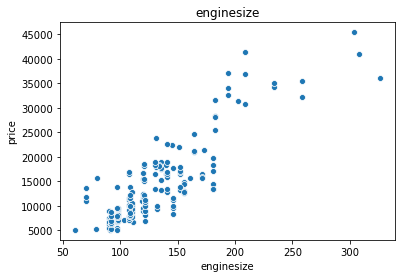

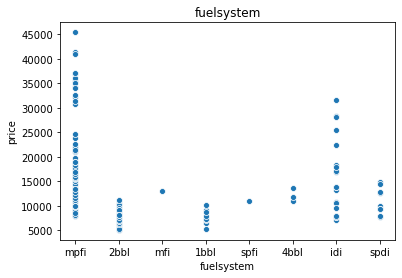

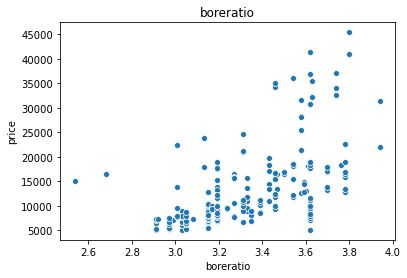

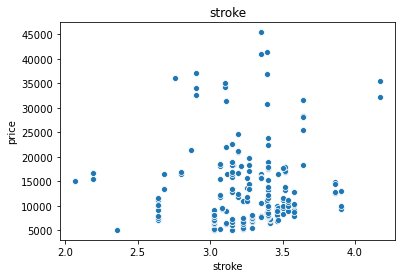

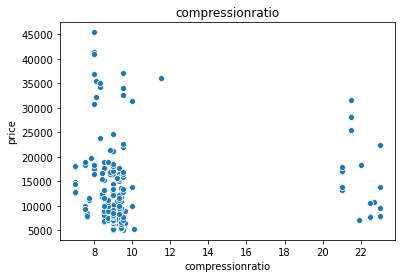

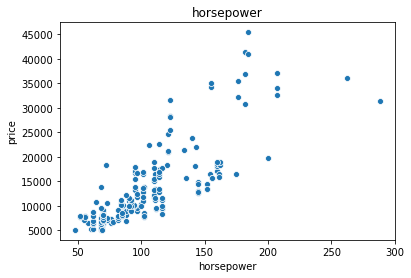

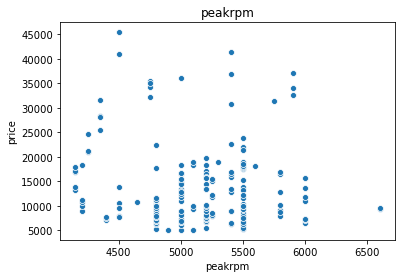

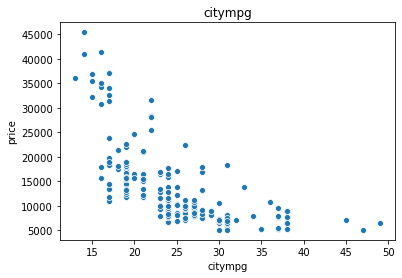

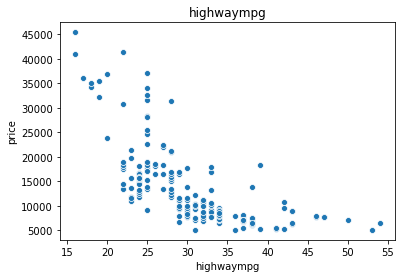

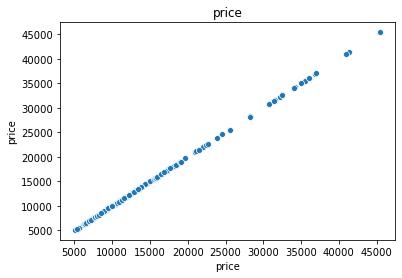

In [16]:
for i in df.columns:
    plt.title(i)
    sns.scatterplot(df[i],df['price'])
    plt.show()

In [17]:
bestvar1 = ['wheelbase','carlength','carwidth','curbweigth','enginesize']

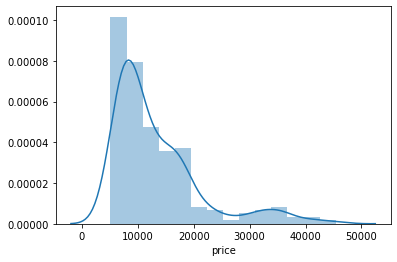

In [18]:
sns.distplot(df['price'])

we see there are cars highest in price range below !0000 $

# Data PreProcessing

In [19]:
df.columns

Index(['symboling', 'make', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [20]:
df1 = df.drop({'make','carlength','carwidth','aspiration', 'doornumber','carbody','drivewheel','carheight',"enginelocation"},axis=1)

In [21]:
df1.columns

Index(['symboling', 'fueltype', 'wheelbase', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [22]:
df1

,symboling,fueltype,wheelbase,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,88.6,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,88.6,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,94.5,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,99.8,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,99.4,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,109.1,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,gas,109.1,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,gas,109.1,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,diesel,109.1,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [23]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
df1['fueltype']= label_encoder.fit_transform(df['fueltype']) 
df1['fueltype'].unique()

array([1, 0])

In [24]:
df1

,symboling,fueltype,wheelbase,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,1,88.6,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,88.6,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,94.5,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,1,99.8,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,1,99.4,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,1,109.1,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,1,109.1,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,1,109.1,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,0,109.1,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [25]:
df1['enginetype']= label_encoder.fit_transform(df['enginetype']) 
df1['enginetype'].unique()

array([0, 5, 3, 2, 6, 4, 1])

In [26]:
df1['fuelsystem']= label_encoder.fit_transform(df['fuelsystem']) 
df1['fuelsystem'].unique()

array([5, 1, 4, 0, 7, 2, 3, 6])

In [27]:
 from word2number import w2n

In [28]:
nums = []
for i in df1['cylindernumber']:
    x = w2n.word_to_num(i)
    nums.append(x)
df1['cylindernumber'] = nums

In [29]:
df1

,symboling,fueltype,wheelbase,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,1,88.6,2548,0,4,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,1,88.6,2548,0,4,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,94.5,2823,5,6,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,1,99.8,2337,3,4,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,1,99.4,2824,3,5,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,1,109.1,2952,3,4,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,1,109.1,3049,3,4,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,1,109.1,3012,5,6,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,0,109.1,3217,3,6,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


# Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np
import statsmodels.api as sm

In [31]:
X = df1[['horsepower']]#.values.reshape(1,-1)
y = df1[['price']]#.values.reshape(1,-1)

In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.7,random_state=42)


In [33]:
LR = LinearRegression()

In [34]:
LR.fit(X_train,y_train)

LinearRegression()

In [35]:
y_pred = LR.predict(X_test)

In [36]:
r2_score(y_pred,y_test)

0.27979618506336734

In [37]:
print('Coefficient is',LR.coef_[0][0])
print('intercept is',LR.intercept_[0])

Coefficient is 157.52524028053594
intercept is -3241.804243638466


Text(27.0, 0.5, 'Price')

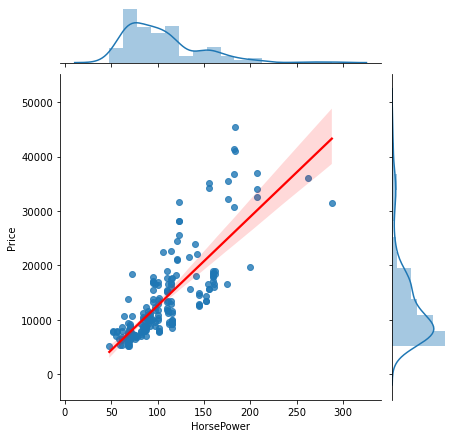

In [38]:
g = sns.jointplot(X,y,kind='reg',
                 joint_kws={'line_kws':{'color':'red'}})
plt.xlabel('HorsePower')
plt.ylabel('Price')

<function matplotlib.pyplot.show(*args, **kw)>

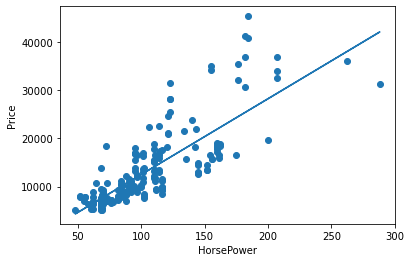

In [39]:
plt.scatter(X,y)
plt.plot(X,LR.predict(X))
plt.xlabel('HorsePower')
plt.ylabel('Price')
plt.show

In [40]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.900
Method:                 Least Squares   F-statistic:                              1854.
Date:                Sun, 31 Jan 2021   Prob (F-statistic):                   2.43e-104
Time:                        14:40:37   Log-Likelihood:                         -2031.7
No. Observations:                 205   AIC:                                      4065.
Df Residuals:                     204   BIC:                                      4069.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

RFE selected Feature

In [41]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler

In [42]:
X = df1.drop('price',axis=1)
y = df1['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.7,random_state=42)

In [43]:
scaler = MinMaxScaler()
X_train1 = scaler.fit_transform(X_train)

In [44]:
model = LinearRegression()

In [45]:
rfe = RFE(model, 1);

C:\Users\kante vishal\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=1 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [46]:
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=1)

In [47]:
X_train.columns[rfe.support_]

Index(['boreratio'], dtype='object')

In [48]:
## Model Building
X = df[['boreratio']]
y = df[['price']]
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.7,random_state=42)
LR = LinearRegression()
LR.fit(X_train,y_train)
y_pred1 = LR.predict(X_train)
print("R2 score is",r2_score(y_pred,y_test))
print('Coefficient is',LR.coef_[0][0])
print('intercept is',LR.intercept_[0])

R2 score is 0.27979618506336734
Coefficient is 15631.185368192808
intercept is -38495.77664498373


<function matplotlib.pyplot.show(*args, **kw)>

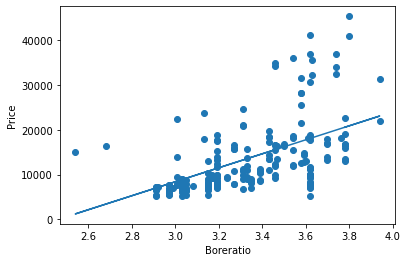

In [49]:
plt.scatter(X,y)
plt.plot(X,LR.predict(X))
plt.xlabel('Boreratio')
plt.ylabel('Price')
plt.show

Text(27.0, 0.5, 'Price')

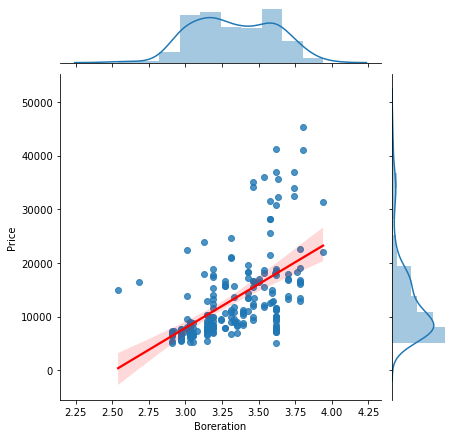

In [50]:
g = sns.jointplot(X,y,kind='reg',
                 joint_kws={'line_kws':{'color':'red'}})
plt.xlabel('Boreration')
plt.ylabel('Price')

In [51]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.770
Model:                            OLS   Adj. R-squared (uncentered):              0.769
Method:                 Least Squares   F-statistic:                              683.8
Date:                Sun, 31 Jan 2021   Prob (F-statistic):                    4.56e-67
Time:                        14:40:40   Log-Likelihood:                         -2117.9
No. Observations:                 205   AIC:                                      4238.
Df Residuals:                     204   BIC:                                      4241.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# Multiple Linear Regression

Self Analysis based Features

In [52]:
df1.columns

Index(['symboling', 'fueltype', 'wheelbase', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [53]:
X = df1.drop('price',axis=1)
y = df1['price']

In [54]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.7,random_state=42)

In [55]:
LR.fit(X_train.values,y_train)

LinearRegression()

In [56]:
y_pred = LR.predict(X_test)

In [57]:
r2_score(y_pred,y_test)

0.7893322567743289

In [58]:
print('Coefficient is',LR.coef_)
print('intercept is',LR.intercept_)

Coefficient is [ 4.22886280e+02 -9.86821498e+02  2.47993605e+02  9.93573987e-01
  3.53218813e+02 -7.34551843e+02  1.33961304e+02 -5.64405910e+01
 -1.91316250e+03 -3.44775920e+03  2.06214676e+02  3.55218797e+01
  2.31168452e+00 -2.36820085e+02  1.00864316e+02]
intercept is -25076.753719908287


In [59]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.961
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              315.3
Date:                Sun, 31 Jan 2021   Prob (F-statistic):                   2.13e-125
Time:                        14:40:41   Log-Likelihood:                         -1935.1
No. Observations:                 205   AIC:                                      3900.
Df Residuals:                     190   BIC:                                      3950.
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

RFE Based features

In [60]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler

In [61]:
scaler = MinMaxScaler()
model = LinearRegression()

In [62]:
## Selecting Top 7 Features
rfe = RFE(model, 7)
X_train1 = scaler.fit_transform(X_train)

C:\Users\kante vishal\anaconda3\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass n_features_to_select=7 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [63]:
rfe.fit(X_train1,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=7)

In [64]:
X_train.columns[rfe.support_]

Index(['wheelbase', 'enginesize', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg'],
      dtype='object')

In [65]:
print("Num Features: %s" % (rfe.n_features_))
print("Selected Features: %s" % (rfe.support_))
print("Feature Ranking: %s" % (rfe.ranking_))

Num Features: 7
Selected Features: [False False  True False False False  True False False  True  True  True
  True  True False]
Feature Ranking: [7 8 1 6 5 2 1 9 3 1 1 1 1 1 4]


In [66]:
#X = df1[{'symboling', 'fueltype', 'boreratio', 'compressionratio', 'citympg'}]
X = df1[{'wheelbase', 'enginesize', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg'}]
y = df1['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=.7,random_state=42)

In [67]:
LR = LinearRegression()
LR.fit(X_train,y_train)
y_pred1 = LR.predict(X_train)
print("R2 score is",r2_score(y_pred,y_test))
print('intercept is',LR.intercept_)
print('Coefficient are',LR.coef_)

R2 score is 0.7893322567743289
intercept is -20658.419195102935
Coefficient are [-2.92917424e+03  1.20048878e+02  1.72227678e+02  3.24266517e+02
  2.31543530e+00 -2.56375397e+02  2.37727309e+01]
